## OpenCV DNN 패키지를 이용하여 Faster R-CNN 기반의 Object Dectection 수행
* tensorflow에서 Pretrained된 모델 파일을 OpenCV에서 로드하여 이미지와 영상에 대한 Object Detection 수행

In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-09-09 05:30:51--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-09-09 05:30:52 (15.1 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



image shape: (633, 806, 3)


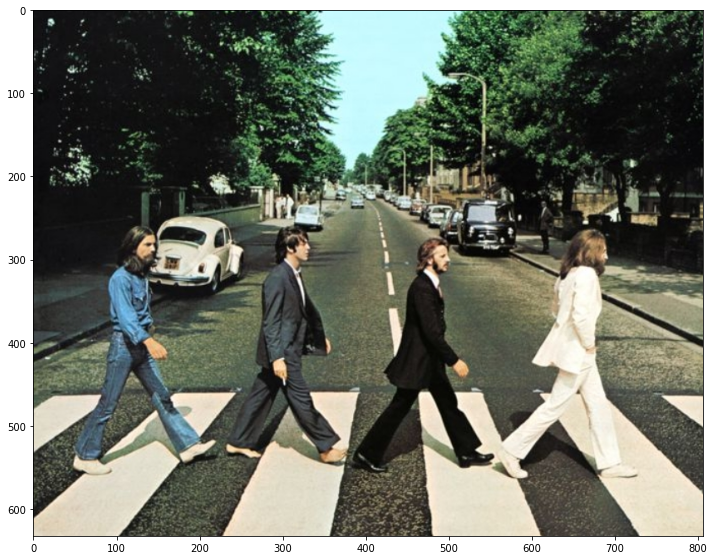

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread("/content/data/beatles01.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print('image shape:',img.shape)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)

Tensorfloe에서 Pretrained 된 Inference 모델과 환경파일을 다운로드 받은 후 이를 이용해 OpenCV Inference 모델 생성

In [ ]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

In [ ]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained

In [7]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296076
2228522 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
2228519 drwxr-xr-x 3 root   root      4096 Sep  9 05:43 ..
2228524 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
2228531 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
2228526 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
2228523 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
2228527 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
2228525 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
2228528 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


dnn에서 readNetFromTensorflow()로 tensorflow inference 모델을 로딩

In [8]:
cv_net=cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     '/content/pretrained/config_graph.pbtxt')

coco 데이터 세트의 클래스 id별 클래스명 지정

In [9]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

이미지를 preprocessing 수행하여 Network에 입력하고 Object Detection 수행 후 결과를 이미지에 시각화

(1, 1, 100, 7)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012


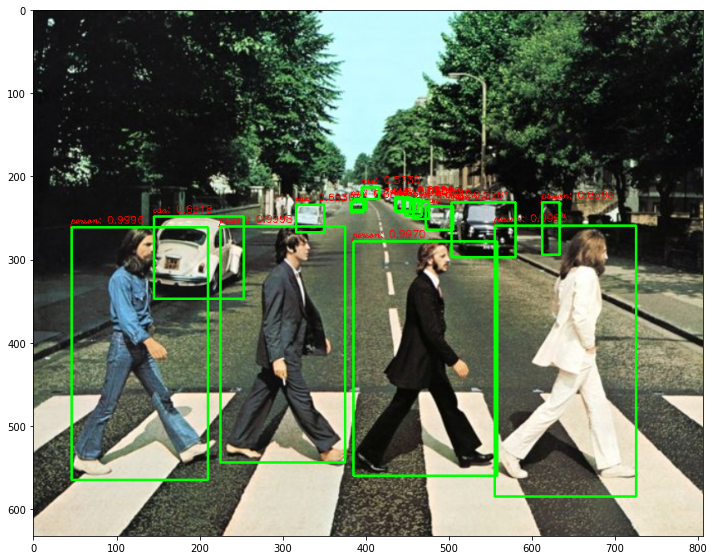

In [16]:
#원본 이미지가 Faster RCNN기반 네트웍으로 입력 시 resize됨
#scaling된 이미지 기반으로 bounding box위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows=img.shape[0]
cols=img.shape[1]

draw_img=img.copy()

cv_net.setInput(cv2.dnn.blobFromImage(img,swapRB=True,crop=False))

cv_out=cv_net.forward()
print(cv_out.shape)

green_color=(0,255,0)
red_color=(0,0,255)

for detection in cv_out[0,0,:,:]:
  score=float(detection[2])
  class_id=int(detection[1])
  #detection된 object들의 score가 0.5 이상만 추출
  if score > 0.5:
    #detection된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    left=detection[3]*cols
    top=detection[4]*rows
    right=detection[5]*cols
    bottom=detection[6]*rows
    caption="{}: {:.4f}".format(labels_to_names_0[class_id],score)
    print(caption)

    cv2.rectangle(draw_img,(int(left),int(top)),(int(right),int(bottom)),color=green_color,thickness=2)
    cv2.putText(draw_img,caption,((int(left),int(top-5))),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.4,red_color,1)

img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)

In [11]:
#cv_net.foward()의 결과는 차례대로, '의미없는 값,class id, score, 좌표값 네개'로 나온다.
cv_out

array([[[[0.00000000e+00, 0.00000000e+00, 9.99780715e-01,
          2.80248284e-01, 4.11070347e-01, 4.66062069e-01,
          8.59829903e-01],
         [0.00000000e+00, 0.00000000e+00, 9.99588192e-01,
          5.82912564e-02, 4.13466036e-01, 2.61212528e-01,
          8.93701494e-01],
         [0.00000000e+00, 0.00000000e+00, 9.99259293e-01,
          6.89431846e-01, 4.10281926e-01, 8.99752796e-01,
          9.24375653e-01],
         [0.00000000e+00, 0.00000000e+00, 9.96988714e-01,
          4.78255421e-01, 4.39302981e-01, 6.92748547e-01,
          8.84738147e-01],
         [0.00000000e+00, 0.00000000e+00, 8.99451733e-01,
          7.59500206e-01, 3.65392357e-01, 7.86593020e-01,
          4.65826124e-01],
         [0.00000000e+00, 0.00000000e+00, 2.80753374e-01,
          7.87774742e-01, 3.81029904e-01, 8.25374067e-01,
          4.47248816e-01],
         [0.00000000e+00, 0.00000000e+00, 1.82083517e-01,
          3.73442054e-01, 3.48522216e-01, 3.83972704e-01,
          4.01509136e-01],

단일 이미지의 object detection을 함수로 생성

In [27]:
import time

def get_detection_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
  rows=img_array.shape[0]
  cols=img_array.shape[1]

  draw_img=None
  if use_copied_array:
    draw_img=img_array.copy()
  else:
    draw_img=img_array

  cv_net.setInput(cv2.dnn.blobFromImage(img_array,swapRB=True,crop=False))
  start=time.time()
  cv_out=cv_net.forward()

  green_color=(0,255,0)
  red_color=(0,0,255)

  for detection in cv_out[0,0,:,:]:
    score=detection[2]
    class_id=detection[1]

    if score > score_threshold:
      left=detection[3]*cols
      top=detection[4]*rows
      right=detection[5]*cols
      bottom=detection[6]*rows

      caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
      print(caption)

      cv2.rectangle(draw_img,(int(left),int(top)),(int(right),int(bottom)),color=green_color,thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
  if is_print:
      print('Detection 수행시간:',round(time.time() - start, 2),"초")

  return draw_img

In [ ]:
# 다른 image 테스트
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

(476, 735, 3)
person: 0.9998
person: 0.9997
person: 0.9977
sports ball: 0.8867
baseball bat: 0.8420
baseball glove: 0.9815
Detection 수행시간: 6.64 초


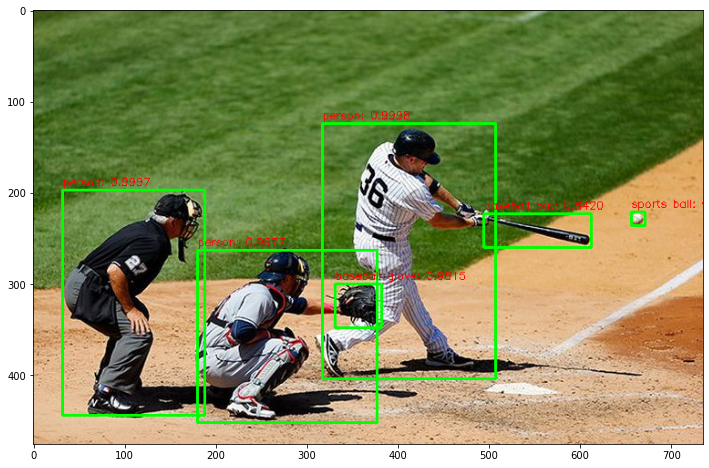

In [28]:
img=cv2.imread('/content/data/baseball01.jpg')
print(img.shape)

cv_net=cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     '/content/pretrained/config_graph.pbtxt')

draw_img=get_detection_img(cv_net,img,score_threshold=0.5,use_copied_array=True,is_print=True)

img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)

## Video Object Detection 수행

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

**VideoCapture와 VideoWriter 설정하기**
* VideoCapture를 이용하여 Videio를 Frame별로 capture 할 수 있도록 설정
* VideoCapture의 속성을 이용하여 Video Frame의 크기 및 FPS 설정
* VideoWriter를 위한 인코딩 코덱 설정 및 영상 write를 위한 설정

In [42]:
video_input_path='/content/data/Jonh_Wick_small.mp4'

cap=cv2.VideoCapture(video_input_path)
frame_cnt=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:',frame_cnt)

총 Frame 갯수: 58


In [43]:
video_output_path='./data/John_Wick_small_cv01.mp4'
 
codec=cv2.VideoWriter_fourcc(*'XVID')

vid_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps=cap.get(cv2.CAP_PROP_FPS)

vid_writer=cv2.VideoWriter(video_output_path,codec,vid_fps,vid_size)

frame_cnt=cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('총 Frame 갯수:',frame_cnt)

총 Frame 갯수: 58.0


총 FRAME 별로 iteration하면서 Object detection수행

In [44]:
green_color=(0, 255, 0)
red_color=(0, 0, 255)

while True:
  hasFrame,img_frame=cap.read()
  if not hasFrame:
    print('더 이상 처리할 frame이 없습니다.')
    break

  rows=img_frame.shape[0]
  cols=img_frame.shape[1]

  cv_net.setInput(cv2.dnn.blobFromImage(img_frame,swapRB=True,crop=False))

  start=time.time()

  cv_out=cv_net.forward()
  frame_index=0
  for detection in cv_out[0,0,:,:]:
    score=detection[2]
    class_id=detection[1]

    if score>0.5:
       left = detection[3] * cols
       top = detection[4] * rows
       right = detection[5] * cols
       bottom = detection[6] * rows
       caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
       cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
       cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
  print('Detection 수행 시간:', round(time.time()-start, 2),'초')
  vid_writer.write(img_frame)

vid_writer.release()
cap.release()

Detection 수행 시간: 7.39 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.34 초
Detection 수행 시간: 7.33 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.31 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.26 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.31 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.3 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.26 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.29 초
Detection 수행 시간: 7.27 초
Detection 수행 시간: 7.28 초
Detection 수행 시간: 7.33 초
Detection 수행 시간: 7.33 초
De